__autor__ = Melany Calderón-Osorno

__versión__ = 0.2

__fecha__ = 2025-07-07

#**Kraken2-Bracken Postprocessing Plots**

This tutorial uses the table generated by the Kraken2-Bracken post-processing step to guide you through creating publication-ready figures.

#**Setup notebook environment**

The following code installs the required libraries.

In [1]:
install.packages("vegan")
install.packages("Hmisc")
install.packages('patchwork')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘permute’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘colorspace’, ‘Formula’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The following code imports the required libraries.

In [2]:
library(readxl)
library(readr)
library(dplyr)
library(ggplot2)
library(vegan)
library(Hmisc)
library(tidyr)
library(gridExtra)
library(patchwork)
library(RColorBrewer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: permute


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




**Input/Output paths**


**Inputs**

We create variables to store the tables generated using the GTDB genomes and GTDB plasmids databases, along with the study metadata.

In [3]:
gn = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/results/Bracken_processing/data/bracken_gtdb_genomes.tsv'
plds = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/results/Bracken_processing/data/bracken_gtdb_plasmids.tsv'
mtd = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/data/data-deepsea.xlsx'

We read the Bracken data generated using the GTDB genomes database.

In [4]:
genomes <- read.table(file = gn, sep = '\t', header = TRUE, row.names = 1, check.names = FALSE)
genomes <- t(genomes)
genomes <- genomes[order(rownames(genomes)), ]
head(genomes)

,Alteromonas macleodii,Alteromonas australica,Alteromonas abrolhosensis,Alteromonas marina,Alteromonas mediterranea,Alteromonas sp. IB21,Alteromonas sp. RKMC-009,Alteromonas sp. KUL106,Alteromonas sp. V450,Alteromonas sp. KC3,⋯,Brevibacterium antiquum,Prochlorococcus sp. AG-402-M18,Prochlorococcus sp. AG-409-O23,Prochlorococcus sp. AG-409-B05,Prochlorococcus sp. AG-409-L14,Prochlorococcus sp. AG-409-J16,Prochlorococcus sp. AG-363-C20,Prochlorococcus sp. AG-363-A16,Prochlorococcus sp. AG-436-K22,Ruminococcus sp. UBA3387
ERR598944,64572,93858,8134,2483,51136,1922,2422,64,47,56,⋯,0,0,0,0,0,0,0,0,0,0
ERR598947,739926,806011,30492,17692,19682,3384,1343,852,417,255,⋯,0,0,0,0,0,0,0,0,0,0
ERR598958,418190,78332,15458,18965,12420,9038,1056,417,235,265,⋯,0,0,0,0,0,0,0,0,0,0
ERR598960,745643,1977649,90814,24792,26306,7060,1400,1202,281,748,⋯,0,0,0,0,0,0,0,0,0,0
ERR598964,203102,299768,8476,8390,130051,6183,1661,226,97,143,⋯,0,0,0,0,0,0,0,0,0,0
ERR598971,5132984,90194,646348,161094,612810,67845,5886,3587,2324,2102,⋯,0,0,0,0,0,0,0,0,0,0


We read the Bracken data generated using the GTDB plasmids database.

In [5]:
plasmidomes <- read.table(file = plds, sep = '\t', header = TRUE, row.names = 1, check.names = FALSE)
plasmidomes <- t(plasmidomes)
plasmidomes <- plasmidomes[order(rownames(plasmidomes)), ]
head(plasmidomes)

,Novosphingobium resinovorum,Novosphingobium sp. EMRT-2,Novosphingobium sp. P6W,Novosphingobium pentaromativorans,Novosphingobium decolorationis,Sphingopyxis sp. 113P3,Sphingopyxis sp. FD7,Sphingopyxis alaskensis,Sphingopyxis macrogoltabida,Sphingopyxis fribergensis,⋯,Sphingobium sp. KCTC 72723,Blastomonas fulva,Bosea sp. F3-2,Bosea sp. AS-1,Variovorax sp. WS11,Acidovorax antarcticus,Ralstonia syzygii,Sphaerotilus sulfidivorans,Thauera sp. K11,Salinigranum rubrum
ERR598944,1044,306,20,158,268,815,183,901,548,32,⋯,0,0,0,0,0,0,0,0,0,0
ERR598947,63,0,0,0,0,140,0,0,75,0,⋯,0,0,0,0,0,0,0,0,0,0
ERR598958,1276,451,14,310,374,842,126,768,465,0,⋯,0,0,0,0,0,0,0,0,0,0
ERR598960,4815,4228,22,736,1598,18088,559,2974,325,52,⋯,0,0,0,0,0,0,0,0,0,0
ERR598964,1790,586,57,437,449,1537,214,999,897,0,⋯,0,0,0,0,0,0,0,0,0,0
ERR598971,358,69,0,54,61,242,19,56,2611,0,⋯,0,0,0,0,0,0,0,0,0,0


We import the study metadata.

In [6]:
mt <- tempfile(fileext = ".xlsx")
download.file(mtd, destfile = mt, mode = "wb")

metadata <- read_excel(mt)
head(metadata)

ENA_Run_Accession_ID,Sample,Ocean,Depth,depth.group,Longitude,Latitude
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
TARA_B100001179,ERR598944,Atlantic,-800,270-1000,-16.8714,43.7182
TRAA_B100000470,ERR598947,Atlantic,-700,270-1000,4.6685,-31.0198
TARA_B100001750,ERR598958,Indian,-250,270-1000,-56.9684,34.1504
TARA_B000000460,ERR598960,Indian,-850,270-1000,26.2905,-35.1889
TARA_B100001765,ERR598964,Atlantic,-740,270-1000,-49.8233,34.0771
TARA_B100000929,ERR598971,Pacific,-380,270-1000,-84.5546,2.0649


 We normalize the genomes data by total abundance (i.e., row-wise total). The result, div, contains the relative abundances for each feature in each sample.

In [41]:
div <- decostand(genomes, "total")
head(div)

,Alteromonas macleodii,Alteromonas australica,Alteromonas abrolhosensis,Alteromonas marina,Alteromonas mediterranea,Alteromonas sp. IB21,Alteromonas sp. RKMC-009,Alteromonas sp. KUL106,Alteromonas sp. V450,Alteromonas sp. KC3,⋯,Brevibacterium antiquum,Prochlorococcus sp. AG-402-M18,Prochlorococcus sp. AG-409-O23,Prochlorococcus sp. AG-409-B05,Prochlorococcus sp. AG-409-L14,Prochlorococcus sp. AG-409-J16,Prochlorococcus sp. AG-363-C20,Prochlorococcus sp. AG-363-A16,Prochlorococcus sp. AG-436-K22,Ruminococcus sp. UBA3387
ERR598944,0.001792848,0.002605977,0.0002258413,6.894074e-05,0.0014197960,5.336452e-05,6.724707e-05,1.776966e-06,1.304960e-06,1.554845e-06,⋯,0,0,0,0,0,0,0,0,0,0
ERR598947,0.022272485,0.024261708,0.0009178386,5.325462e-04,0.0005924472,1.018617e-04,4.042559e-05,2.564602e-05,1.255210e-05,7.675746e-06,⋯,0,0,0,0,0,0,0,0,0,0
ERR598958,0.015387278,0.002882222,0.0005687762,6.978161e-04,0.0004569932,3.325527e-04,3.885546e-05,1.534349e-05,8.646812e-06,9.750660e-06,⋯,0,0,0,0,0,0,0,0,0,0
ERR598960,0.018872068,0.050053881,0.0022984833,6.274803e-04,0.0006657993,1.786871e-04,3.543371e-05,3.042237e-05,7.112051e-06,1.893172e-05,⋯,0,0,0,0,0,0,0,0,0,0
ERR598964,0.005754085,0.008492730,0.0002401336,2.376972e-04,0.0036844761,1.751706e-04,4.705781e-05,6.402808e-06,2.748108e-06,4.051334e-06,⋯,0,0,0,0,0,0,0,0,0,0
ERR598971,0.138934932,0.002441289,0.0174947585,4.360346e-03,0.0165869825,1.836367e-03,1.593169e-04,9.708965e-05,6.290391e-05,5.689502e-05,⋯,0,0,0,0,0,0,0,0,0,0


We calculate richness, Shannon diversity, and Pielou’s evenness indices for the genome data.

In [8]:
Richness_genomes <- rowSums(div > 0)
Shannon_genomes <- diversity(div)
Pielou_genomes <- Shannon_genomes/log(Richness_genomes)

The diversity index results are merged with the metadata.

In [9]:
diversity <- data.frame(Richness_genomes, Shannon_genomes, Pielou_genomes)
diversity <- tibble::rownames_to_column(diversity, "sample")
diversity$Ocean <- metadata$Ocean
diversity$Depth <- metadata$Depth
diversity$depth.group <- metadata$depth.group
diversityG= diversity
head(diversityG)

,sample,Richness_genomes,Shannon_genomes,Pielou_genomes,Ocean,Depth,depth.group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,ERR598944,1561,4.178271,0.5682340,Atlantic,-800,270-1000
2,ERR598947,1482,3.993427,0.5469588,Atlantic,-700,270-1000
3,ERR598958,1476,4.472076,0.6128574,Indian,-250,270-1000
4,ERR598960,1868,4.111089,0.5457712,Indian,-850,270-1000
5,ERR598964,1564,4.276563,0.5814497,Atlantic,-740,270-1000
6,ERR598971,1535,4.190910,0.5712577,Pacific,-380,270-1000


We group the samples by depth category and calculate summary statistics for the Richness index.

In [10]:
diversityG %>%  group_by(depth.group) %>% summarise(mean = mean(Richness_genomes), n = n(), min = min(Richness_genomes), max = max(Richness_genomes))

depth.group,mean,n,min,max
<chr>,<dbl>,<int>,<dbl>,<dbl>
2400-4005,587.7857,28,314,785
270-1000,1300.1321,53,475,2462


We group the samples by depth category and ocean, then calculate summary statistics for the Richness index.

In [11]:
diversityG %>%  group_by(depth.group, Ocean) %>% summarise(mean = mean(Richness_genomes), n = n(), min = min(Richness_genomes), max = max(Richness_genomes))

`summarise()` has grouped output by 'depth.group'. You can override using the
`.groups` argument.


depth.group,Ocean,mean,n,min,max
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
2400-4005,Atlantic,573.1429,14,314,785
2400-4005,Indian,573.5000,6,497,677
2400-4005,Pacific,624.1250,8,497,772
270-1000,Atlantic,1552.6000,15,857,2462
270-1000,Indian,1083.9167,12,475,2364
270-1000,Pacific,1254.2692,26,690,2164


We group the samples by depth category and calculate summary statistics for the Shannon index.

In [12]:
diversityG %>%  group_by(depth.group) %>% summarise(mean = mean(Shannon_genomes), n = n(), min = min(Shannon_genomes), max = max(Shannon_genomes))

depth.group,mean,n,min,max
<chr>,<dbl>,<int>,<dbl>,<dbl>
2400-4005,3.756317,28,3.187887,4.27181
270-1000,4.055214,53,3.326876,4.57497


We group the samples by depth category and ocean, then calculate summary statistics for the Shannon index.

In [13]:
diversityG %>%  group_by(depth.group, Ocean) %>% summarise(mean = mean(Shannon_genomes), n = n(), min = min(Shannon_genomes), max = max(Shannon_genomes))

`summarise()` has grouped output by 'depth.group'. You can override using the
`.groups` argument.


depth.group,Ocean,mean,n,min,max
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
2400-4005,Atlantic,3.713351,14,3.187887,4.082337
2400-4005,Indian,3.866517,6,3.623456,4.050370
2400-4005,Pacific,3.748858,8,3.365461,4.271810
270-1000,Atlantic,4.074237,15,3.326876,4.489734
270-1000,Indian,3.844723,12,3.521967,4.472076
270-1000,Pacific,4.141389,26,3.825220,4.574970


We create a boxplot showing genome richness across two depth groups, with data separated by ocean.

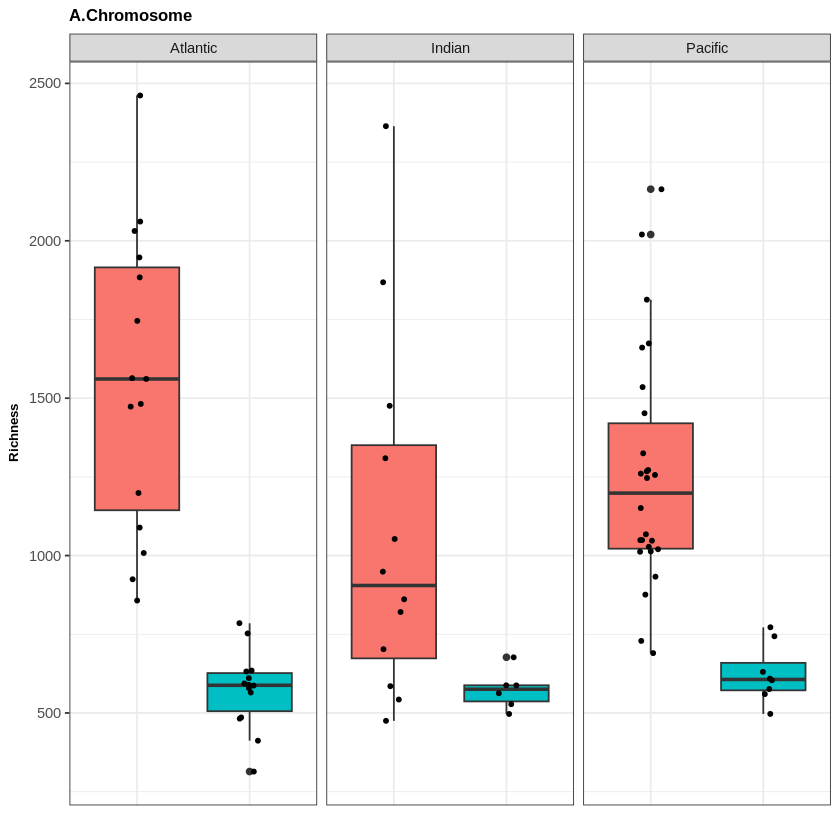

In [14]:
g1=ggplot(diversityG, aes(factor(depth.group, levels = c("270-1000", "2400-4005")),Richness_genomes,fill=depth.group)) +
  geom_boxplot() + geom_jitter(width = 0.1, size=1)+
  scale_fill_discrete(limits = c('270-1000', '2400-4005'))+
  facet_grid(~ Ocean, scales = "free_x", space = "free_x")+
  theme_bw()+ggtitle("A.Chromosome")+ylab("Richness") + xlab("")+
  theme(plot.title = element_text(size = 10, face="bold"),
        axis.text.x = element_blank(),
        axis.title.y = element_text(size=8,face="bold"),
        axis.ticks.x=element_blank(),
        legend.text = element_text(size = 8),
        legend.position = "none",
        legend.title = element_text(size = 8),
        legend.key.size = unit(0.4, "cm"))+
  labs(fill = "Depth [m]")
g1

We create a boxplot showing genome Shannon index across two depth groups, with data separated by ocean.

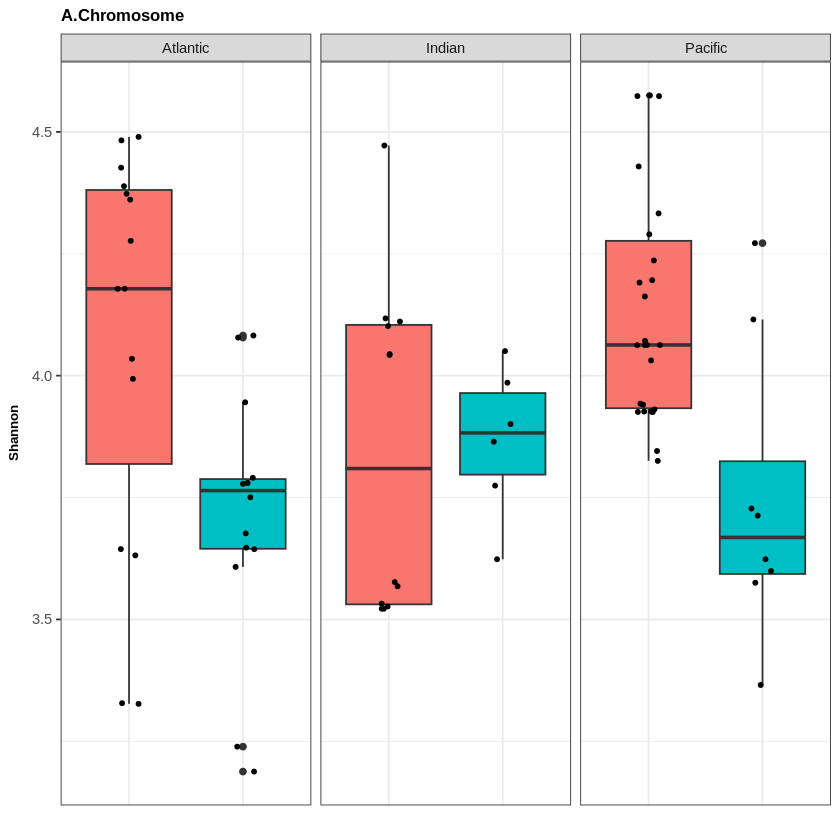

In [15]:
g2=ggplot(diversityG, aes(factor(depth.group, levels = c("270-1000", "2400-4005")),Shannon_genomes,fill=depth.group)) +
  geom_boxplot() + geom_jitter(width = 0.1, size=1)+
  scale_fill_discrete(limits = c('270-1000', '2400-4005'))+
  facet_grid(~ Ocean, scales = "free_x", space = "free_x") +
  theme_bw()+ggtitle("A.Chromosome")+ylab("Shannon") + xlab("")+
  theme(plot.title = element_text(size = 10, face="bold"),
        axis.text.x = element_blank(),#element_text(size=9,face="bold"),
        axis.title.y = element_text(size=8,face="bold"),
        axis.ticks.x=element_blank(),
        legend.text = element_text(size = 7),
        legend.position = "none",
        legend.key.size = unit(0.3, "cm"),
        legend.title = element_blank())
g2

 We normalize the plasmid data by total abundance (i.e., row-wise total). The result, div2, contains the relative abundances for each feature in each sample.

In [42]:
div2 <- decostand(plasmidomes, "total")
head(div2)

,Novosphingobium resinovorum,Novosphingobium sp. EMRT-2,Novosphingobium sp. P6W,Novosphingobium pentaromativorans,Novosphingobium decolorationis,Sphingopyxis sp. 113P3,Sphingopyxis sp. FD7,Sphingopyxis alaskensis,Sphingopyxis macrogoltabida,Sphingopyxis fribergensis,⋯,Sphingobium sp. KCTC 72723,Blastomonas fulva,Bosea sp. F3-2,Bosea sp. AS-1,Variovorax sp. WS11,Acidovorax antarcticus,Ralstonia syzygii,Sphaerotilus sulfidivorans,Thauera sp. K11,Salinigranum rubrum
ERR598944,0.0033014572,0.0009676685,6.324631e-05,0.0004996458,0.0008475005,0.0025772870,5.787037e-04,0.0028492461,0.0017329488,0.0001011941,⋯,0,0,0,0,0,0,0,0,0,0
ERR598947,0.0006580597,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,0.0014623548,0.000000e+00,0.0000000000,0.0007834044,0.0000000000,⋯,0,0,0,0,0,0,0,0,0,0
ERR598958,0.0104949746,0.0037094307,1.151486e-04,0.0025497195,0.0030761132,0.0069253672,1.036338e-03,0.0063167245,0.0038245793,0.0000000000,⋯,0,0,0,0,0,0,0,0,0,0
ERR598960,0.0172130268,0.0151145748,7.864727e-05,0.0026311086,0.0057126515,0.0646623530,1.998356e-03,0.0106316805,0.0011618346,0.0001858935,⋯,0,0,0,0,0,0,0,0,0,0
ERR598964,0.0078352411,0.0025650566,2.495021e-04,0.0019128494,0.0019653761,0.0067278020,9.367271e-04,0.0043728524,0.0039263750,0.0000000000,⋯,0,0,0,0,0,0,0,0,0,0
ERR598971,0.0012934227,0.0002492910,0.000000e+00,0.0001950973,0.0002203877,0.0008743248,6.864534e-05,0.0002023231,0.0094333147,0.0000000000,⋯,0,0,0,0,0,0,0,0,0,0


We calculate richness, Shannon diversity, and Pielou’s evenness indices for the plasmid data.

In [17]:
Richness_plasmidomes <- rowSums(div2 > 0)
Shannon_plasmidomes <- diversity(div2)
Pielou_plasmidomes <- Shannon_plasmidomes/log(Richness_plasmidomes)

The diversity index results are merged with the metadata.

In [18]:
diversity2 <- data.frame(Richness_plasmidomes, Shannon_plasmidomes, Pielou_plasmidomes)
diversity2 <- tibble::rownames_to_column(diversity2, "sample")
diversity2$Ocean <- metadata$Ocean
diversity2$Depth <- metadata$Depth
diversity2$depth.group <- metadata$depth.group
diversityP= diversity2
head(diversityP)

,sample,Richness_plasmidomes,Shannon_plasmidomes,Pielou_plasmidomes,Ocean,Depth,depth.group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,ERR598944,137,2.946845,0.5989546,Atlantic,-800,270-1000
2,ERR598947,96,3.108478,0.6810344,Atlantic,-700,270-1000
3,ERR598958,111,3.342970,0.7098309,Indian,-250,270-1000
4,ERR598960,154,3.498607,0.6945880,Indian,-850,270-1000
5,ERR598964,135,3.245833,0.6617026,Atlantic,-740,270-1000
6,ERR598971,115,2.985364,0.6291690,Pacific,-380,270-1000


We group the samples by depth category and calculate summary statistics for the Richness index.

In [19]:
diversityP %>%  group_by(depth.group) %>% summarise(mean = mean(Richness_plasmidomes), n = n(), min = min(Richness_plasmidomes), max = max(Richness_plasmidomes))

depth.group,mean,n,min,max
<chr>,<dbl>,<int>,<dbl>,<dbl>
2400-4005,51.46429,28,14,79
270-1000,101.33962,53,25,190


We group the samples by depth category and ocean, then calculate summary statistics for the Richness index.

In [20]:
diversityP %>%  group_by(depth.group, Ocean) %>% summarise(mean = mean(Richness_plasmidomes), n = n(), min = min(Richness_plasmidomes), max = max(Richness_plasmidomes))

`summarise()` has grouped output by 'depth.group'. You can override using the
`.groups` argument.


depth.group,Ocean,mean,n,min,max
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
2400-4005,Atlantic,53.50000,14,18,79
2400-4005,Indian,47.00000,6,14,77
2400-4005,Pacific,51.25000,8,36,70
270-1000,Atlantic,121.00000,15,61,180
270-1000,Indian,80.41667,12,25,176
270-1000,Pacific,99.65385,26,32,190


We group the samples by depth category and calculate summary statistics for the Shannon index.

In [21]:
diversityP %>%  group_by(depth.group) %>% summarise(mean = mean(Shannon_plasmidomes), n = n(), min = min(Shannon_plasmidomes), max = max(Shannon_plasmidomes))

depth.group,mean,n,min,max
<chr>,<dbl>,<int>,<dbl>,<dbl>
2400-4005,3.072967,28,1.931348,3.634445
270-1000,3.130571,53,2.307149,4.004838


We group the samples by depth category and ocean, then calculate summary statistics for the Shannon index.

In [22]:
diversityP %>%  group_by(depth.group, Ocean) %>% summarise(mean = mean(Shannon_plasmidomes), n = n(), min = min(Shannon_plasmidomes), max = max(Shannon_plasmidomes))

`summarise()` has grouped output by 'depth.group'. You can override using the
`.groups` argument.


depth.group,Ocean,mean,n,min,max
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
2400-4005,Atlantic,3.104027,14,1.931348,3.634445
2400-4005,Indian,2.831878,6,2.143633,3.266390
2400-4005,Pacific,3.199428,8,2.922866,3.507121
270-1000,Atlantic,3.141155,15,2.409366,3.887074
270-1000,Indian,3.023951,12,2.425941,3.560194
270-1000,Pacific,3.173673,26,2.307149,4.004838


We create a boxplot illustrating plasmid richness across two depth groups, with data grouped by ocean.

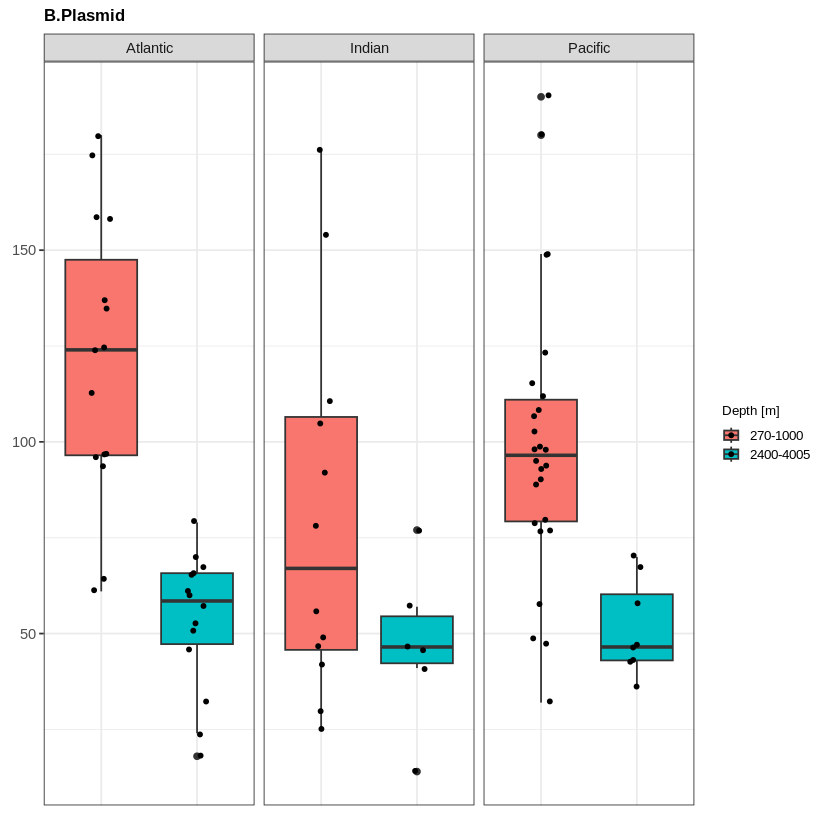

In [23]:
p1=ggplot(diversityP, aes(factor(depth.group, levels = c("270-1000", "2400-4005")),Richness_plasmidomes,fill=depth.group)) +
  geom_boxplot() + geom_jitter(width = 0.1, size=1)+
  scale_fill_discrete(limits = c('270-1000', '2400-4005'))+
  facet_grid(~ Ocean, scales = "free_x", space = "free_x") +
  theme_bw()+ggtitle("B.Plasmid")+ylab("") + xlab("")+
  theme(plot.title = element_text(size = 10, face="bold"),
        axis.text.x = element_blank(),
        axis.title.y = element_blank(),
        axis.ticks.x=element_blank(),
        legend.text = element_text(size = 8),
        legend.position = "right",
        legend.title = element_text(size = 8),
        legend.key.size = unit(0.4, "cm"))+
  labs(fill = "Depth [m]")
p1

We create a boxplot illustrating the plasmid Shannon index across two depth groups, with data grouped by ocean.

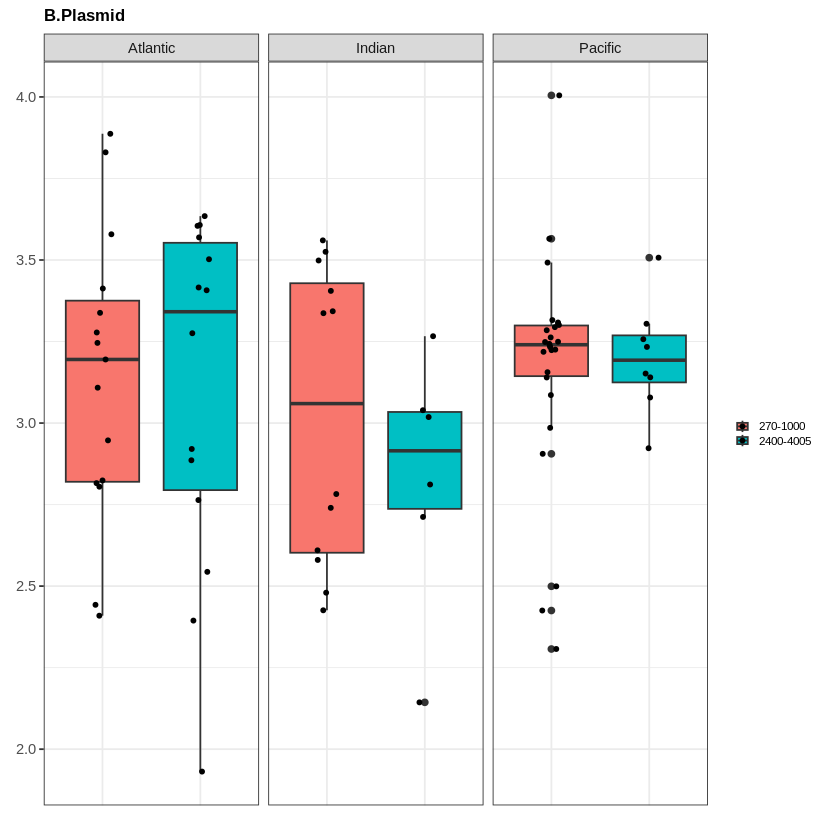

In [24]:

p2=ggplot(diversityP, aes(factor(depth.group, levels = c("270-1000", "2400-4005")),Shannon_plasmidomes,fill=depth.group)) +
  geom_boxplot() + geom_jitter(width = 0.1, size=1)+
  scale_fill_discrete(limits = c('270-1000', '2400-4005'))+
  facet_grid(~ Ocean, scales = "free_x", space = "free_x") +
  theme_bw()+ggtitle("B.Plasmid")+ylab("") + xlab("")+
  theme(plot.title = element_text(size = 10, face="bold"),
        axis.text.x = element_blank(),
        axis.title.y = element_blank(),
        axis.ticks.x=element_blank(),
        legend.text = element_text(size = 7),
        legend.position = "right",
        legend.key.size = unit(0.3, "cm"),
        legend.title = element_blank())
p2

We create a plot displaying genome and plasmid richness, as well as the Shannon index.

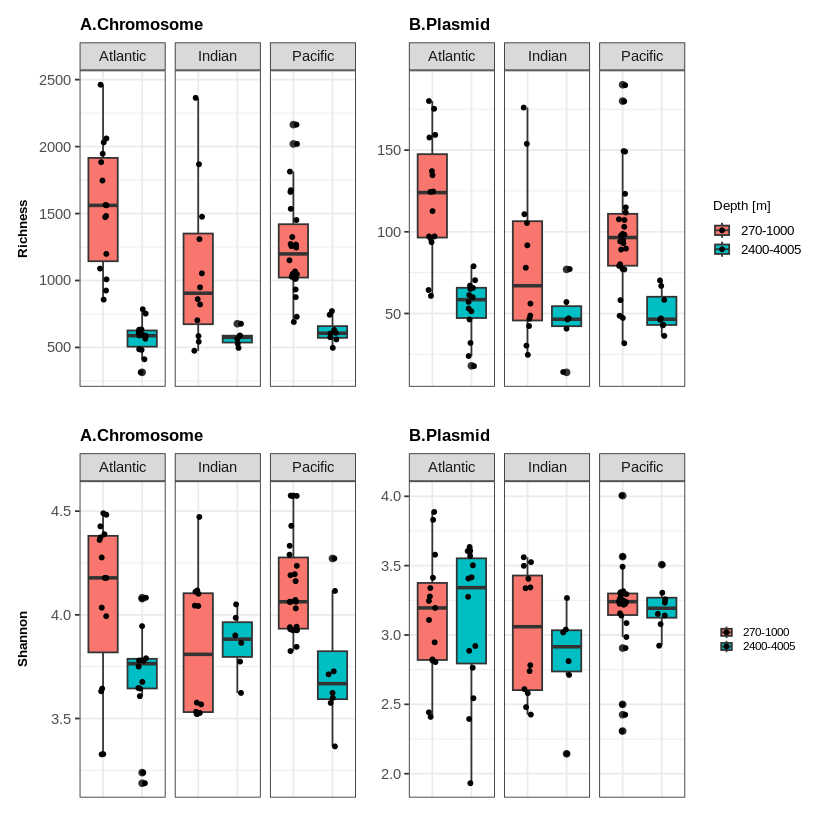

In [25]:
(g1/g2)|(p1/p2)

We perform Kruskal-Wallis tests to assess whether genome richness and Shannon diversity differ significantly between depth groups and between oceans.

In [26]:
kruskal.test(Richness_genomes ~ depth.group, data = diversityG) # significant diff
kruskal.test(Shannon_genomes ~ depth.group, data = diversityG) # significant diff
kruskal.test(Richness_genomes ~ Ocean, data = diversityG) # no diff
kruskal.test(Shannon_genomes ~ Ocean, data = diversityG) # no diff


	Kruskal-Wallis rank sum test

data:  Richness_genomes by depth.group
Kruskal-Wallis chi-squared = 43.873, df = 1, p-value = 3.503e-11



	Kruskal-Wallis rank sum test

data:  Shannon_genomes by depth.group
Kruskal-Wallis chi-squared = 14.165, df = 1, p-value = 0.0001675



	Kruskal-Wallis rank sum test

data:  Richness_genomes by Ocean
Kruskal-Wallis chi-squared = 3.9169, df = 2, p-value = 0.1411



	Kruskal-Wallis rank sum test

data:  Shannon_genomes by Ocean
Kruskal-Wallis chi-squared = 5.1035, df = 2, p-value = 0.07794


We perform Kruskal-Wallis tests to assess whether plasmid richness and Shannon diversity differ significantly between depth groups and between oceans.

In [27]:
kruskal.test(Richness_plasmidomes ~ depth.group, data = diversityP) # significant diff
kruskal.test(Shannon_plasmidomes ~ depth.group, data = diversityP) # significant diff
kruskal.test(Richness_plasmidomes ~ Ocean, data = diversityP) # no diff
kruskal.test(Shannon_plasmidomes ~ Ocean, data = diversityP) # no diff


	Kruskal-Wallis rank sum test

data:  Richness_plasmidomes by depth.group
Kruskal-Wallis chi-squared = 28.659, df = 1, p-value = 8.629e-08



	Kruskal-Wallis rank sum test

data:  Shannon_plasmidomes by depth.group
Kruskal-Wallis chi-squared = 0.10098, df = 1, p-value = 0.7507



	Kruskal-Wallis rank sum test

data:  Richness_plasmidomes by Ocean
Kruskal-Wallis chi-squared = 4.4291, df = 2, p-value = 0.1092



	Kruskal-Wallis rank sum test

data:  Shannon_plasmidomes by Ocean
Kruskal-Wallis chi-squared = 2.0919, df = 2, p-value = 0.3514


We normalizes the genomes data by total abundance, performs a non-metric multidimensional scaling (NMDS) analysis on it, and outputs the NMDS result.

In [28]:
nmds_genomes <- decostand(genomes, "total")
nmds_genomes <- metaMDS(nmds_genomes,trace = FALSE)
nmds_genomes # 0.12


Call:
metaMDS(comm = nmds_genomes, trace = FALSE) 

global Multidimensional Scaling using monoMDS

Data:     nmds_genomes 
Distance: bray 

Dimensions: 2 
Stress:     0.1233707 
Stress type 1, weak ties
Best solution was not repeated after 20 tries
The best solution was from try 0 (metric scaling or null solution)
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘nmds_genomes’ 


The following code extracts NMDS site scores into a data frame, adds sample names and metadata columns for Ocean and depth group, and stores the result for further analysis.

In [29]:
data.scores <- as.data.frame(scores(nmds_genomes)$sites)
data.scores <- tibble::rownames_to_column(data.scores, "sample")
grp <- metadata$Ocean
data.scores$Ocean <- grp
grp2 <- metadata$depth.group
data.scores$depth.group <- grp2
data.scoresG <- data.scores
head(data.scoresG)

,sample,NMDS1,NMDS2,Ocean,depth.group
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,ERR598944,-0.2853888,-0.2732937,Atlantic,270-1000
2,ERR598947,-0.1548498,-0.2136383,Atlantic,270-1000
3,ERR598958,-0.1645577,-1.2215332,Indian,270-1000
4,ERR598960,-0.1851785,-0.2501428,Indian,270-1000
5,ERR598964,-0.1775869,-0.1969342,Atlantic,270-1000
6,ERR598971,0.3942647,-0.1912499,Pacific,270-1000


We create an NMDS scatter plot of genome data, with samples colored by depth group and shaped by ocean.

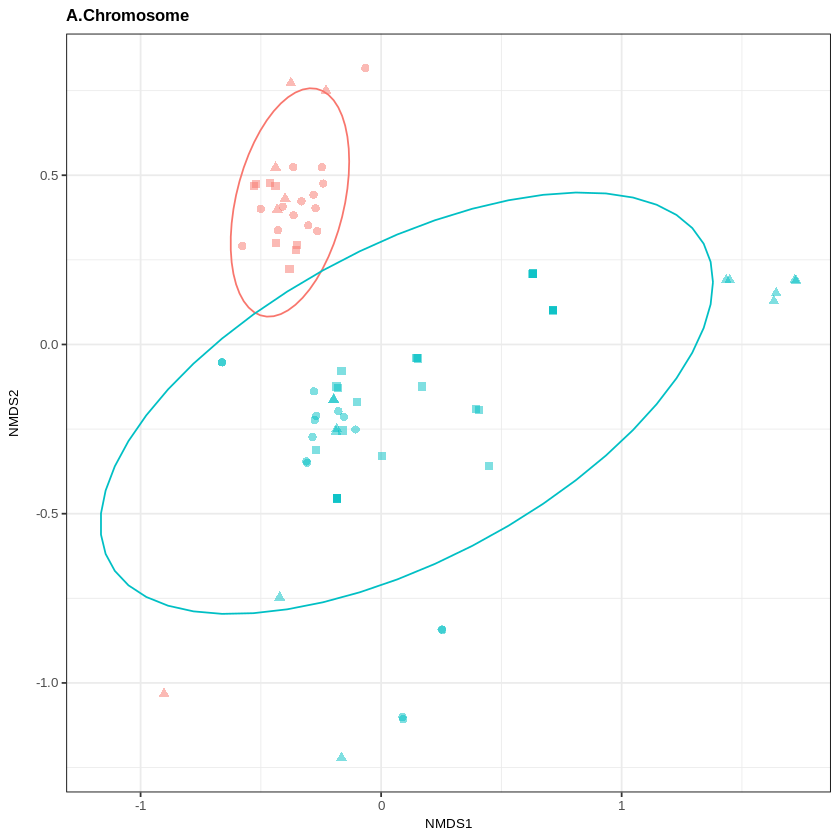

In [30]:
k1 <- ggplot(data = data.scoresG, aes(x = NMDS1, y = NMDS2)) +
  geom_point(data = data.scoresG, aes(color = depth.group, shape=Ocean),size = 2, alpha = 0.5) +
  stat_ellipse(aes(color = depth.group)) +
  theme_bw()+ ggtitle("A.Chromosome")+ ylab("NMDS2") + xlab("NMDS1")+
  theme(panel.border = element_rect(colour = "black"),
        plot.title = element_text(size = 10, face="bold"),
        axis.text.x = element_text(size = 8),
        axis.text.y = element_text(size = 8),
        axis.title.x = element_text(size = 8),
        axis.title.y = element_text(size = 8),
        legend.position = "none",
        legend.text = element_text(size = 6),
        legend.title = element_blank(),
        legend.key.size = unit(0.3, "cm"))
k1

We normalizes the plasmid data by total abundance, performs a non-metric multidimensional scaling (NMDS) analysis on it, and outputs the NMDS result.

In [31]:
nmds_plasmidomes <- decostand(plasmidomes, "total")
nmds_plasmidomes <- metaMDS(nmds_plasmidomes,trace = FALSE)
nmds_plasmidomes


Call:
metaMDS(comm = nmds_plasmidomes, trace = FALSE) 

global Multidimensional Scaling using monoMDS

Data:     nmds_plasmidomes 
Distance: bray 

Dimensions: 2 
Stress:     0.1668037 
Stress type 1, weak ties
Best solution was repeated 8 times in 20 tries
The best solution was from try 11 (random start)
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘nmds_plasmidomes’ 


The following code extracts NMDS site scores into a data frame, adds sample names and metadata columns for Ocean and depth group, and stores the result for further analysis.

In [32]:
data.scores2 <- as.data.frame(scores(nmds_plasmidomes)$sites)
data.scores2 <- tibble::rownames_to_column(data.scores2, "sample")
grp3 <- metadata$Ocean
data.scores2$Ocean <- grp3
grp4 <- metadata$depth.group
data.scores2$depth.group <- grp4
data.scoresP <- data.scores2
head(data.scoresP)

,sample,NMDS1,NMDS2,Ocean,depth.group
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,ERR598944,-0.9817299,-0.24037207,Atlantic,270-1000
2,ERR598947,0.6772561,0.02762537,Atlantic,270-1000
3,ERR598958,-0.4150782,-0.20048035,Indian,270-1000
4,ERR598960,-0.3254013,-0.60887574,Indian,270-1000
5,ERR598964,-0.6400207,-0.14340689,Atlantic,270-1000
6,ERR598971,0.2308608,-0.21261344,Pacific,270-1000


We create an NMDS scatter plot of plasmid data, with samples colored by depth group and shaped by ocean.

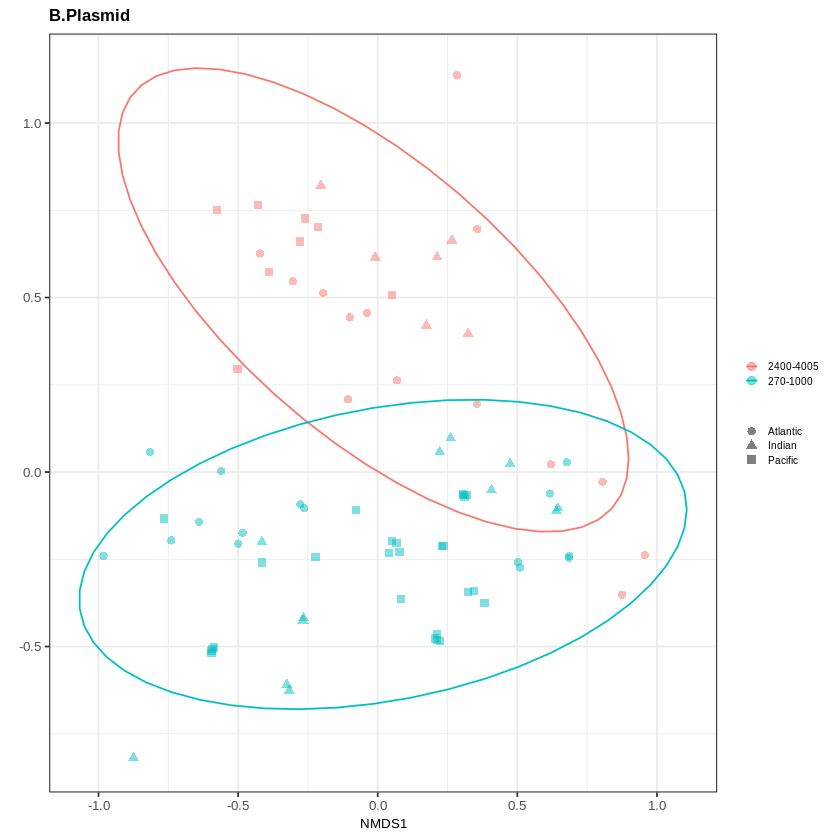

In [33]:
k2 <- ggplot(data = data.scoresP, aes(x = NMDS1, y = NMDS2)) +
  geom_point(data = data.scoresP, aes(color = depth.group, shape=Ocean),size = 2, alpha = 0.5) +
  stat_ellipse(aes(color = depth.group)) +
  theme_bw()+ ggtitle("B.Plasmid")+ ylab("") + xlab("NMDS1")+
  theme(panel.border = element_rect(colour = "black"),
        plot.title = element_text(size = 10, face="bold"),
        axis.text.x = element_text(size = 8),
        axis.text.y = element_text(size = 8),
        axis.title.x = element_text(size = 8),
        axis.title.y = element_blank(),
        legend.position = "right",
        legend.text = element_text(size = 6),
        legend.title = element_blank(),
        legend.key.size = unit(0.3, "cm"))
k2

We save the diversity plots for both genome and plasmid data.

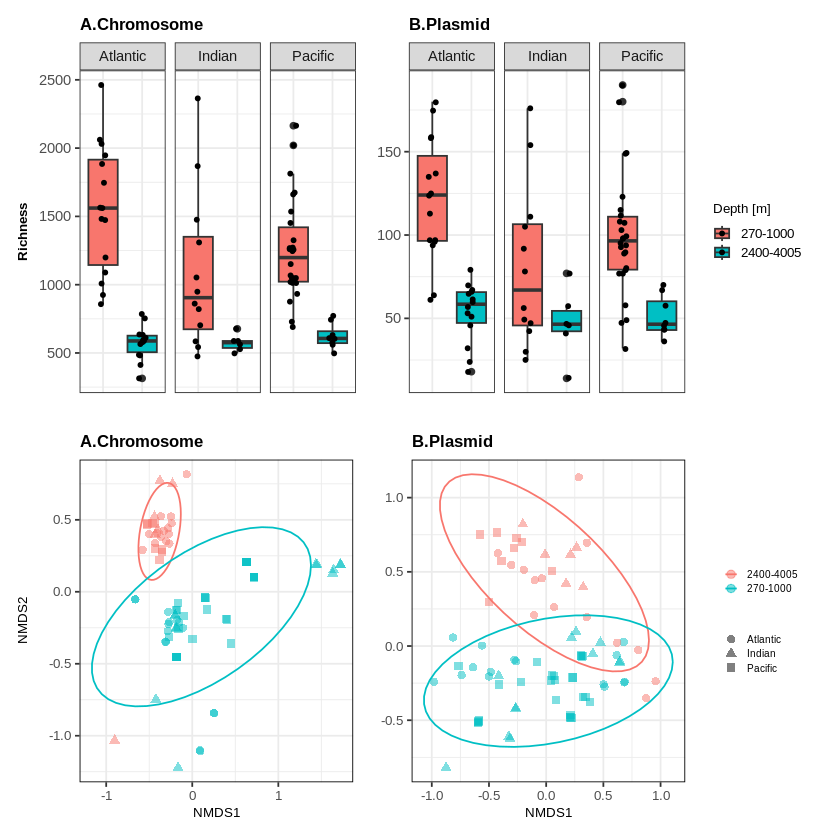

In [34]:
(g1 + p1) / (k1 + k2)
ggsave("Figure1.png",  width = 18, height = 8, units = "cm",dpi = 300)

The following code normalizes genome data by total abundance and performs PERMANOVA tests to assess significant differences in community composition by depth group and ocean.

In [35]:
per_genomes <- decostand(genomes, "total")
adonis2(per_genomes ~ depth.group, metadata, perm=1000)# significant diff p=0.001
adonis2(per_genomes ~ Ocean, metadata, perm=1000)# significant diff p=0.001

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,1,3.387157,0.2164468,21.82277,0.000999001
Residual,79,12.261755,0.7835532,NA,NA
Total,80,15.648913,1.0000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,2,1.740528,0.1112236,4.880552,0.000999001
Residual,78,13.908385,0.8887764,NA,NA
Total,80,15.648913,1.0000000,NA,NA


This code loads a custom pairwise PERMANOVA function and uses it to perform pairwise comparisons of genome compositions between ocean groups with Bray-Curtis distances and Benjamini-Hochberg p-value adjustment.

In [36]:
source("https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/data/pairwise.adonis.R")
factors=metadata$Ocean
pairwise.adonis(per_genomes,factors, sim.method = "bray", p.adjust.m ="BH")

pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Atlantic vs Indian,1,1.0133921,5.104496,0.10187700,0.001,0.0015,*
Atlantic vs Pacific,1,0.9102831,5.934106,0.08865594,0.001,0.0015,*
Indian vs Pacific,1,0.6924134,3.634472,0.06776373,0.008,0.0080,*


This code calculates a dissimilarity matrix from genome data, tests for differences in group dispersion among oceans using betadisper, and performs an ANOVA to assess significance.

In [37]:
dis <- vegdist(per_genomes)
groups <- metadata$Ocean
mod <- betadisper(dis, groups)
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Groups,2,0.1981425,0.099071260,14.82815,3.484596e-06
Residuals,78,0.5211412,0.006681298,NA,NA


The following code normalizes plasmid data by total abundance and performs PERMANOVA tests to assess significant differences in community composition by depth group and ocean.

In [38]:
per_plasmidomes <- decostand(plasmidomes, "total")
adonis2(per_plasmidomes ~ depth.group, metadata, perm=1000)# significant diff p=0.001
adonis2(per_plasmidomes ~ Ocean, metadata, perm=1000)# significant diff p=0.001

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,1,2.622194,0.1732948,16.56006,0.000999001
Residual,79,12.509211,0.8267052,NA,NA
Total,80,15.131405,1.0000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,2,1.187691,0.07849178,3.321923,0.000999001
Residual,78,13.943714,0.92150822,NA,NA
Total,80,15.131405,1.00000000,NA,NA


This code loads a custom pairwise PERMANOVA function and uses it to perform pairwise comparisons of plasmid compositions between ocean groups with Bray-Curtis distances and Benjamini-Hochberg p-value adjustment.

In [39]:
source("https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/data/pairwise.adonis.R")
factors=metadata$Ocean
pairwise.adonis(per_plasmidomes,factors, sim.method = "bray", p.adjust.m ="BH")

pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Atlantic vs Indian,1,0.5470792,2.839509,0.05935490,0.009,0.010,*
Atlantic vs Pacific,1,0.6802209,3.844298,0.05928506,0.003,0.009,*
Indian vs Pacific,1,0.5314678,3.154520,0.05934623,0.010,0.010,*


This code calculates a dissimilarity matrix from plasmid data, tests for differences in group dispersion among oceans using betadisper, and performs an ANOVA to assess significance.

In [40]:
dis <- vegdist(per_plasmidomes)
groups <- metadata$Ocean
mod <- betadisper(dis, groups)
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Groups,2,0.03458247,0.017291237,2.099199,0.1294252
Residuals,78,0.64249103,0.008237064,NA,NA
